In [1]:
import pandas as pd
import imblearn
import matplotlib.pyplot as plt 
import numpy as np
import random

from collections import Counter
from imblearn.over_sampling import SVMSMOTE

from sklearn import metrics 
from sklearn.metrics import f1_score,confusion_matrix,classification_report,recall_score,precision_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
data = pd.read_csv('data/data.csv')
labels = pd.read_csv('data/labels.csv')

In [3]:
x = data.iloc[:,3:]
x = x.drop('routes.1', axis=1)

y1 = labels['800_yard_season']
y2 = labels['1000_yard_season']

In [4]:
Counter(y1)

Counter({0: 314, 1: 63})

Counter({0: 314, 1: 63})

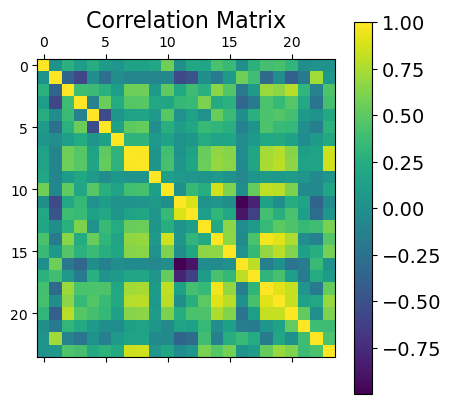

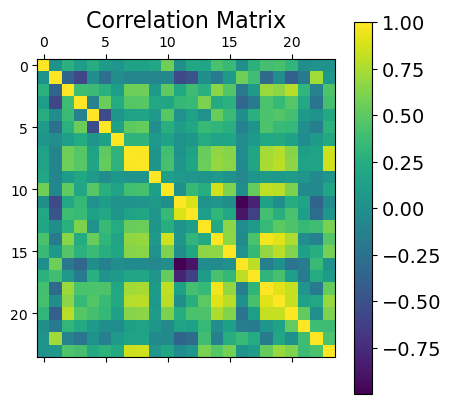

In [5]:
import matplotlib.pyplot as plt

plt.matshow(x.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.savefig('correlation_matrix.png')
plt.show()
#x.style.format(precision=2).background_gradient(cmap='coolwarm')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y1, 
                                   random_state=33,  
                                   test_size=0.2,  
                                   shuffle=True) 

In [7]:
len(X_train)

301

301

In [8]:
len(X_test)

76

76

In [9]:
x_train_scaled = StandardScaler().fit_transform(X_train)
x_test_scaled = StandardScaler().fit_transform(X_test)

In [10]:
pca = PCA(n_components=20)

pca_Xtrain = pca.fit_transform(x_train_scaled)
pca_Xtest = pca.transform(x_test_scaled)

explained_variance = pca.explained_variance_ratio_
sum(explained_variance[0:10])

0.9514061360276462

0.9514061360276462

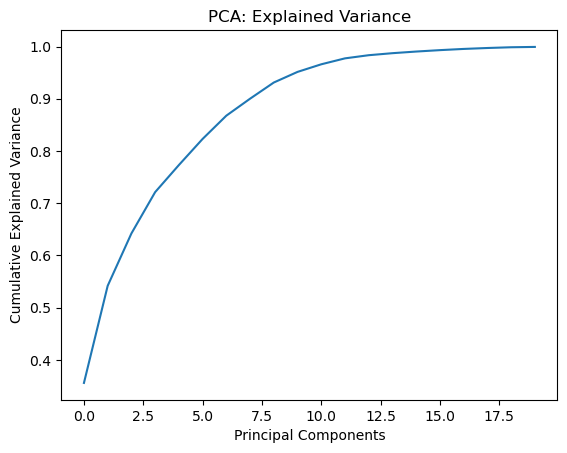

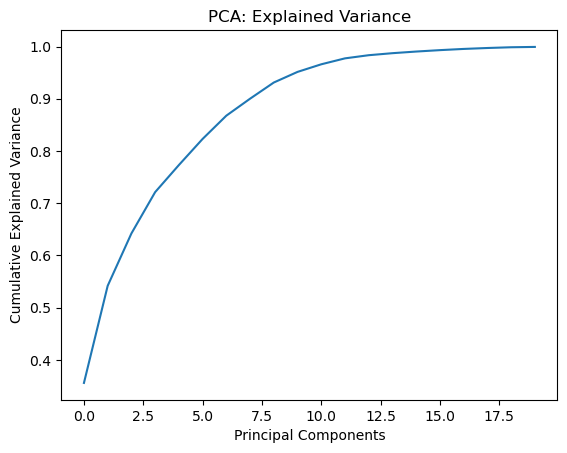

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance')
plt.savefig('pca.png')
plt.show()

In [12]:
#Create DFs with first 10 principal components
pca10_Xtrain = pd.DataFrame(data = pca_Xtrain[:,0:10])
pca10_Xtest = pd.DataFrame(data = pca_Xtest[:,0:10])

In [13]:
sm = SVMSMOTE(random_state=33)
Xtrain_res, y_res = sm.fit_resample(pca10_Xtrain, y_train)

In [14]:
len(Xtrain_res)

496

496

In [15]:
len(y_res)

496

496

In [16]:
print("Labels training",Counter(y_train))

print("Labels test",Counter(y_test))

Labels training Counter({0: 248, 1: 53})
Labels test Counter({0: 66, 1: 10})
Labels training Counter({0: 248, 1: 53})
Labels test Counter({0: 66, 1: 10})


In [17]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 248, 1: 248})
Resampled dataset shape Counter({0: 248, 1: 248})


Naive Bayes, Log Reg, SVM, NN, KNN, Decision Tree, Random Forest

## Naive Bayes

In [18]:
gnb = GaussianNB()
gnb.fit(Xtrain_res, y_res)
   
# making predictions on the testing set
y_pred = gnb.predict(pca10_Xtest)

In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[48 18]
 [ 4  6]]
Accuracy Score: 0.7105263157894737
Precision: 0.25
Recall: 0.6
F1 score: 0.35294117647058826
Confusion Matrix 
 [[48 18]
 [ 4  6]]
Accuracy Score: 0.7105263157894737
Precision: 0.25
Recall: 0.6
F1 score: 0.35294117647058826


## Logistic Regression

In [20]:
logreg = LogisticRegression(random_state=33)
logreg.fit(Xtrain_res, y_res)

y_pred = logreg.predict(pca10_Xtest)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[45 21]
 [ 6  4]]
Accuracy Score: 0.6447368421052632
Precision: 0.16
Recall: 0.4
F1 score: 0.22857142857142856
Confusion Matrix 
 [[45 21]
 [ 6  4]]
Accuracy Score: 0.6447368421052632
Precision: 0.16
Recall: 0.4
F1 score: 0.22857142857142856


## SVM

In [33]:
clf = svm.SVC()
clf.fit(Xtrain_res, y_res)

y_pred = clf.predict(pca10_Xtest)

In [34]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[50 16]
 [ 6  4]]
Accuracy Score: 0.7105263157894737
Precision: 0.2
Recall: 0.4
F1 score: 0.26666666666666666
Confusion Matrix 
 [[50 16]
 [ 6  4]]
Accuracy Score: 0.7105263157894737
Precision: 0.2
Recall: 0.4
F1 score: 0.26666666666666666


## Neural Network

In [24]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)
clf.fit(Xtrain_res, y_res)

y_pred = clf.predict(pca10_Xtest)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[56 10]
 [ 8  2]]
Accuracy Score: 0.7631578947368421
Precision: 0.16666666666666666
Recall: 0.2
F1 score: 0.1818181818181818
Confusion Matrix 
 [[56 10]
 [ 8  2]]
Accuracy Score: 0.7631578947368421
Precision: 0.16666666666666666
Recall: 0.2
F1 score: 0.1818181818181818


## KNN

In [27]:
parameters = {'n_neighbors': list(range(1,16)), 'weights':["uniform", "distance"]}
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, parameters, cv = 10, scoring = 'accuracy')
knn_grid.fit(Xtrain_res, y_res)

y_pred = knn_grid.predict(pca10_Xtest)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print("Best parameters",knn_grid.best_params_)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[48 18]
 [ 5  5]]
Best parameters {'n_neighbors': 2, 'weights': 'uniform'}
Accuracy Score: 0.6973684210526315
Precision: 0.21739130434782608
Recall: 0.5
F1 score: 0.30303030303030304
Confusion Matrix 
 [[48 18]
 [ 5  5]]
Best parameters {'n_neighbors': 2, 'weights': 'uniform'}
Accuracy Score: 0.6973684210526315
Precision: 0.21739130434782608
Recall: 0.5
F1 score: 0.30303030303030304


## Decision Tree

In [29]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain_res, y_res)

y_pred = clf.predict(pca10_Xtest)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[54 12]
 [ 5  5]]
Accuracy Score: 0.7763157894736842
Precision: 0.29411764705882354
Recall: 0.5
F1 score: 0.37037037037037035
Confusion Matrix 
 [[54 12]
 [ 5  5]]
Accuracy Score: 0.7763157894736842
Precision: 0.29411764705882354
Recall: 0.5
F1 score: 0.37037037037037035


## Random Forest

In [31]:
parameters = {'max_features': ['sqrt', 'log2', None],}
rf = RandomForestClassifier()

rf_grid = GridSearchCV(rf, parameters, cv = 10, scoring = 'accuracy')
rf_grid.fit(Xtrain_res, y_res)

y_pred = rf_grid.predict(pca10_Xtest)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm)
print("Best parameters",rf_grid.best_params_)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[58  8]
 [ 7  3]]
Best parameters {'max_features': 'sqrt'}
Accuracy Score: 0.8026315789473685
Precision: 0.2727272727272727
Recall: 0.3
F1 score: 0.28571428571428564
Confusion Matrix 
 [[58  8]
 [ 7  3]]
Best parameters {'max_features': 'sqrt'}
Accuracy Score: 0.8026315789473685
Precision: 0.2727272727272727
Recall: 0.3
F1 score: 0.28571428571428564
